# HDS 5230 Homework 14 - Deep learning with keras

*Authors: Miao Cai <miao.cai@slu.edu>*

*Department of Epidemiology and Biostatistics, Saint Louis University*

## Libraries

In [1]:
import os
import pathlib
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
## Enable inline plotting for graphics
%matplotlib inline
## Set default figure size to be larger 
## this may only work in matplotlib 2.0+!
matplotlib.rcParams['figure.figsize'] = [10.0,6.0]
## Enable multiple outputs from jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Get Version information
print(sys.version)
print("Pandas version: {0}".format(pd.__version__))
print("Matplotlib version: {0}".format(matplotlib.__version__))
print("Numpy version: {0}".format(np.__version__))
print("Tensorflow version: {0}".format(tf.__version__))

3.7.1 (default, Dec 14 2018, 13:28:58) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version: 0.23.4
Matplotlib version: 3.0.2
Numpy version: 1.15.4
Tensorflow version: 1.13.1


## Simulate a non-linear relationship

Simulate a non-linear relationship that would be hard to be modeled with linear modeling methods, such as `sin`, `cosin`, `inverse`, etc.

The following relationship should be modeled:

1. only have one input(`x`)
2. add some error into the model, then calculate `Y`
3. make a graph of `x` versus `y` with points to visualize the relationship

In [5]:
import scipy.stats as ss
np.random.seed(666)

n = 500
x = np.random.normal(loc=0,
                      scale=4,
                      size=n)
## simulate outcome
error = \
    np.random.normal(loc=0,
                     scale=3,
                     size=n)
## map to outcome
y = 10 + 5*np.sin(x) + error

/Users/miaocai/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


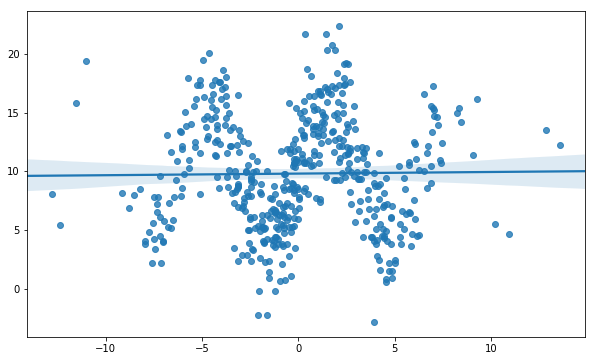

In [6]:
sns.regplot(x,y)

## Fit a shallow neural network with one hidden layer

1. Be sure to standardize your input
2. You can start with a small number of epochs (300 ish)
3. Plot the history of the loss function across epochs
4. Plot the history of another metric that is not the loss function across epochs
5. Predict a new range of `X`'s as a line along with the original data as dots to understand how well your model fits

In [7]:
from keras import models
from keras import layers
from keras import optimizers

def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(1,
                           activation = 'linear',
                           input_dim=1))
    model.compile(optimizer ='SGD', 
                  loss = 'mse',
                  metrics = ['mae'])
    return model

Using TensorFlow backend.


In [8]:
from sklearn import preprocessing
trans_1 = preprocessing.StandardScaler().fit(x.reshape(-1, 1))
x_scale = trans_1.transform(x.reshape(-1, 1)) 

## fit this model/architecture to my data
regr = build_model1()
regr.fit(x_scale, y, epochs = 300, verbose = 0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
## summarize model
regr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
## Retrieve the weights
regr.get_weights()

[array([[0.06326589]], dtype=float32), array([9.800141], dtype=float32)]

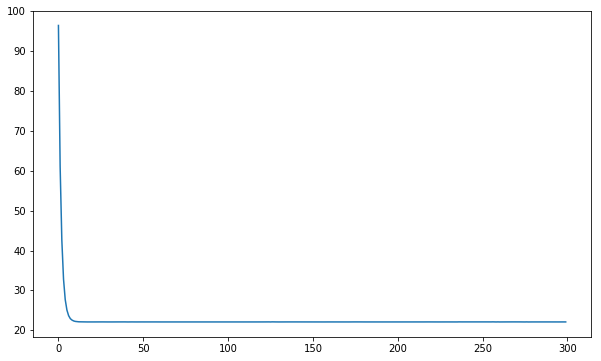

In [11]:
## plot the loss function per epoch
plt.plot(regr.history.history['loss'])

['loss', 'mean_absolute_error']

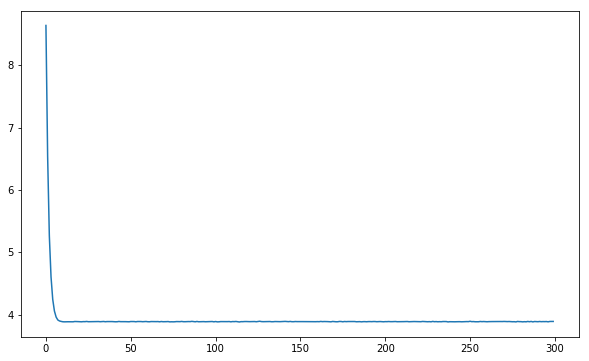

In [12]:
## plot a metric per epoch
regr.metrics_names
plt.plot(regr.history.history['mean_absolute_error'])

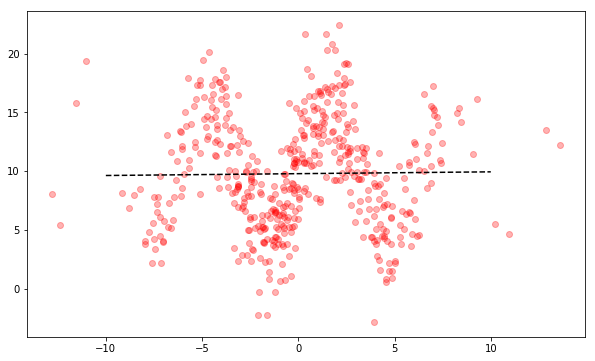

In [13]:
## original data
plt.plot(x, y,'ro',alpha=0.3)
## generate regular points along the range of x 
x2_range = np.linspace(-10,10,200)
## make predictions and plot
plt.plot(x2_range, 
         regr.predict(trans_1.transform(x2_range.reshape(-1, 1))),
         'k--')

Although the loss function and mean absolute error appear to be okay, the prediction plot turns out to be very bad.

## Expand the neural network to more capacity

Different approaches: add layers (make it deeper), add more units per layer (make it wider), and more epochs

1. plot the history of the loss function and one more model metric across epochs
2. predict a new range of `X`'s as a line along with the original data as dots to understand how well your model fits.

In [14]:
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(64,
                           activation = 'relu',
                           input_dim=1))
    model.add(layers.Dense(64,
                           activation = 'relu'))
    model.add(layers.Dense(1,
                           activation = 'linear'))
    model.compile(optimizer ='RMSprop', 
                  loss = 'mse',
                  metrics = ['mae'])
    return model

In [15]:
## fit this model/architecture to my data
regr4 = build_model2()
regr4.fit(x_scale,
         y,
         epochs = 1000,
         batch_size = 64,
         verbose=0)

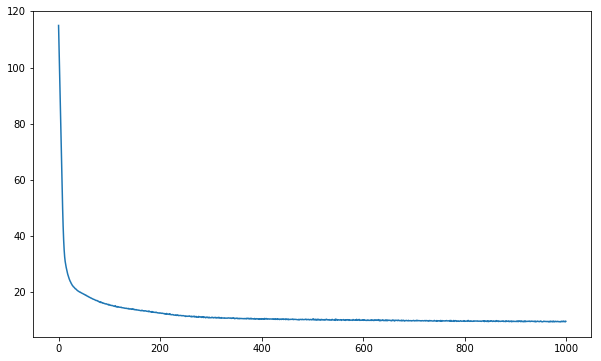

In [16]:
## plot the loss function
plt.plot(regr4.history.history['loss'])

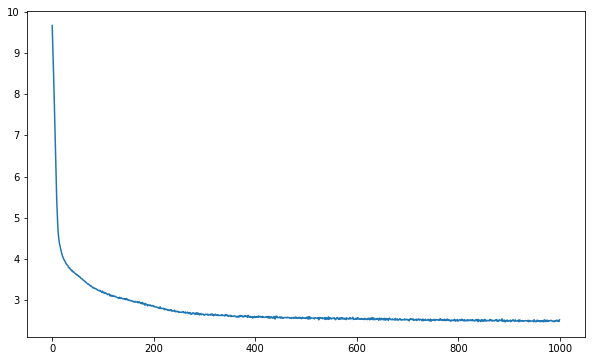

In [17]:
## plot the metrics
plt.plot(regr4.history.history['mean_absolute_error'])

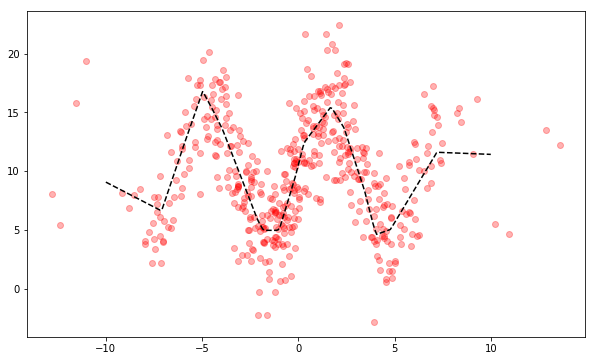

In [18]:
## original data
plt.plot(x, y,'ro',alpha=0.3)
## generate regular points along the range of x 
x2_range = np.linspace(-10,10,200)
## make predictions and plot
plt.plot(x2_range, 
         regr4.predict(trans_1.transform(x2_range.reshape(-1, 1))),
         'k--')

The prediction results seem reasonably well.